In [2]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import pandas as pd

import cobra
#import escher
 
%matplotlib inline

<h3> Loading the Ecoli models <h3>

In [3]:
from genericpath import isfile
import os

dir = 'data'
models = []

# for filename in os.scandir(dir):
#     f = os.path.join(filename)
#     if filename.is_file():
#         print(filename.name)
#         models.append(cobra.io.read_sbml_model(f))
    
#cobra.io.read_sbml_model("./data/iEC1344_C.xml")
#model = cobra.io.load_model("textbook") 
# for i in models[0].reactions:
#     print(i)

<h2> BiGG Model to Networkx Graph

In [4]:
tmodel = cobra.io.load_model('e_coli_core')
tmodel.optimize()

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


,fluxes,reduced_costs
PFK,7.477382,-1.387779e-17
PFL,0.000000,2.081668e-17
PGI,4.860861,0.000000e+00
PGK,-16.023526,6.938894e-18
PGL,4.959985,1.517883e-17
...,...,...
NADH16,38.534610,0.000000e+00
NADTRHD,0.000000,-2.546243e-03
NH4t,4.765319,-1.387779e-17
O2t,21.799493,0.000000e+00


In [5]:
#pfk = tmodel.reactions.get_by_id('P3HB')
#pfk.flux

In [6]:
rxns = {}#[]
mbls = set()#[]

"""TO DO:
- Add fluxes, aka weighted edges for metabolites: Stoichemetric, how many of each does it take/produce. Always an integer.
- Fix node font size
- Do with actual model not just ecoli_core
"""

for rxn in tmodel.reactions:  #1. For each reaction in the E_Coli_Core reactions
    reactants_list = []       
    for i in rxn.reactants:   #2. Append the reaction substrates
        print(i)
        reactants_list.append(i.id)
    #print(reactants_list)
    products_list = []
    for i in rxn.products:      #3. Append the reaction products
        products_list.append(i.id)
            
    rxns[rxn.id] = reactants_list, products_list #append to dictionary

for mbl in tmodel.metabolites: mbls.add(mbl.id)# 4. Append all metabolites in E_Coli_Core
   
print(len(rxns))
#display(rxns)
print(len(mbls))
#display(mbls)


atp_c
f6p_c
coa_c
pyr_c
g6p_c
3pg_c
atp_c
6pgl_c
h2o_c
acald_c
coa_c
nad_c
akg_e
h_e
2pg_c
h_e
pi_e
etoh_c
nad_c
acald_e
ac_c
atp_c
co2_c
h2o_c
pep_c
cit_c
acon_C_c
h2o_c
atp_c
h2o_c
atp_c
oaa_c
ac_e
h_e
atp_c
h2o_c
pyr_c
amp_c
atp_c
akg_c
coa_c
nad_c
adp_c
h_e
pi_c
accoa_c
pi_c
adp_c
h_c
pep_c
3pg_c
accoa_c
atp_c
e4p_c
f6p_c
g3p_c
g6p_c
gln__L_c
glu__L_c
h2o_c
nad_c
nadph_c
oaa_c
pep_c
pyr_c
r5p_c
h_e
pyr_e
co2_e
ru5p__D_c
accoa_c
h2o_c
oaa_c
r5p_c
h_e
succ_e
h_c
o2_c
q8h2_c
h_e
lac__D_e
2pg_c
h_e
succ_c
etoh_e
h_e
q8_c
succ_c
atp_c
coa_c
succ_c
g3p_c
s7p_c
h_e
nadh_c
nadp_c
r5p_c
xu5p__D_c
e4p_c
xu5p__D_c
dhap_c
ac_e
acald_e
akg_e
co2_e
etoh_e
for_e
fru_e
fum_e
glc__D_e
gln__L_e
glu__L_e
h_e
h2o_e
lac__D_e
mal__L_e
nh4_e
o2_e
pi_e
pyr_e
succ_e
fdp_c
fdp_c
h2o_c
for_e
h_e
for_e
fum_c
q8h2_c
fru_e
pep_c
fum_c
h2o_c
fum_e
h_e
g6p_c
nadp_c
g3p_c
nad_c
pi_c
glc__D_e
pep_c
atp_c
glu__L_c
nh4_c
atp_c
gln__L_e
h2o_c
glu__L_c
h2o_c
nadp_c
gln__L_c
h2o_c
akg_c
gln__L_c
h_c
nadph_c
glu__L_e
h_e

In [7]:
B = nx.DiGraph()
B.add_nodes_from(mbls, bipartite=1,)
B.add_nodes_from(rxns, bipartite=1)

In [8]:
"""Add edges for substrate, products to/out reactions"""

for name in rxns: #For each reaction ID in the dictionary
    subs, prods = rxns[name]
    for sub in subs:    #For each substrate 
        #print(sub)
        #ADD AN EDGE FROM SUBSTRATE TO REACTION. Where left hand side is metabolites and right is reactions
        B.add_edge(sub, name)
        
    for prod in prods:
        #ADD AN EDGE FROM REACTION TO PRODUCTS
        B.add_edge(name, prod)
        
    #B.add_edge()

#print(rxns)
#B.add_edge('PFK', '2pg_c')

<H3>Get interesting paths (highest degree, shortest, longest, biomass related) </h3>

In [9]:
#Select highest degree node in reactions and get path
#tmodel.reactions.get_by_id("BIOMASS_Ecoli_core_w_GAM")
max_degree = ('', 0)
for i in B.degree():
    if(i[0] in mbls):
    #print(i[0])
        if i[1] > max_degree[1]:
            max_degree = i
print(max_degree)

biomass_path = B.in_edges('BIOMASS_Ecoli_core_w_GAM')
#path_edges = list(zip(biomass_path,biomass_path[1:]))
short_path = nx.shortest_path(B, source='glu__L_c', target='nadp_c')

print(short_path)
#biomass_path.append(B.out_edges('BIOMASS_Ecoli_core_w_GAM'))
#print(short_path)

#
tmodel.reactions.get_by_id('BIOMASS_Ecoli_core_w_GAM').flux

paths = nx.all_simple_paths(B, 'h_c', 'atp_c', cutoff=12)

longest_path = []
for i in paths:
    if len(i) > len(longest_path):
        longest_path = i
    #
print(longest_path)

('h_c', 35)
['glu__L_c', 'BIOMASS_Ecoli_core_w_GAM', 'nadp_c']
['h_c', 'PYK', 'pyr_c', 'PFL', 'accoa_c', 'PTAr', 'coa_c', 'ACALD', 'nadh_c', 'NADH16', 'h_e', 'ATPS4r', 'atp_c']


Shortest Path Using Manual Knockout

In [10]:
B.nodes['BIOMASS_Ecoli_core_w_GAM']
G = B.copy()
G.remove_node("BIOMASS_Ecoli_core_w_GAM") #Important to remove this otherwise just jumps through Pseudoreaction. 
G.remove_node("G6PDH2r")
G.remove_node("pyr_c")


paths = nx.all_shortest_paths(G, "glc__D_e", "nadp_c" )

for i in paths:
    print(i)
    #

['glc__D_e', 'GLCpts', 'g6p_c', 'PGI', 'f6p_c', 'PFK', 'h_c', 'GLUSy', 'nadp_c']


In [11]:
def draw_bipartite(G,z, first_partition, input_path, node_flag = False):
    # MODIFY THIS FUNCTION AS NEEDED
    # input  : G is a networkx graph
    #        : z is a dictionary of group labels for G's nodes
    # output : a circular layout plot (ignores edge weights)
    # 
    # WARNING: function is optimistic: assumes inputs are properly formatted

    colors = ['#d67711','#11d646','#1b11d6','#d611cc'] # map node labels to colors (for the visualization)

    node_colors = []
    for i in G.nodes():
        node_colors.append(colors[int(z[i])])
    nsize  = 500
    flabel = True

    if G.order() > 200:
        nsize  = 100
        flabel = False
        
    d = dict(G.degree)
    
    
    #pos = nx.draw_networkx(G,edge_color='teal',with_labels=flabel,node_size=nsize,width=2,node_color=node_colors,pos = nx.bipartite_layout(G, nodes=first_partition))#pos = nx.circular_layout(G)) # draw it pretty
    nx.draw(G,edge_color='teal',with_labels=flabel,node_size = [v * 100 for v in d.values()] if node_flag else nsize ,width=2,node_color= [v * 100 for v in d.values()] if node_flag else node_colors, pos = nx.bipartite_layout(G, nodes=first_partition))
    pos = nx.bipartite_layout(G, nodes=first_partition)
    path_edges = list(zip(input_path, input_path[1:]))
    #path_edges = input_path
    print(path_edges)
    nx.draw_networkx_edges(G, pos=pos, edgelist=path_edges, edge_color='purple',width=4)
    limits=plt.axis('off')                                      # turn off axes 
    plt.show() 

    return

In [12]:
#Z is dictionary of partitions
z = {}
for rxn in rxns:
    z[rxn] = 1
for met in mbls:
    z[met] = 0
#display(z)

[]


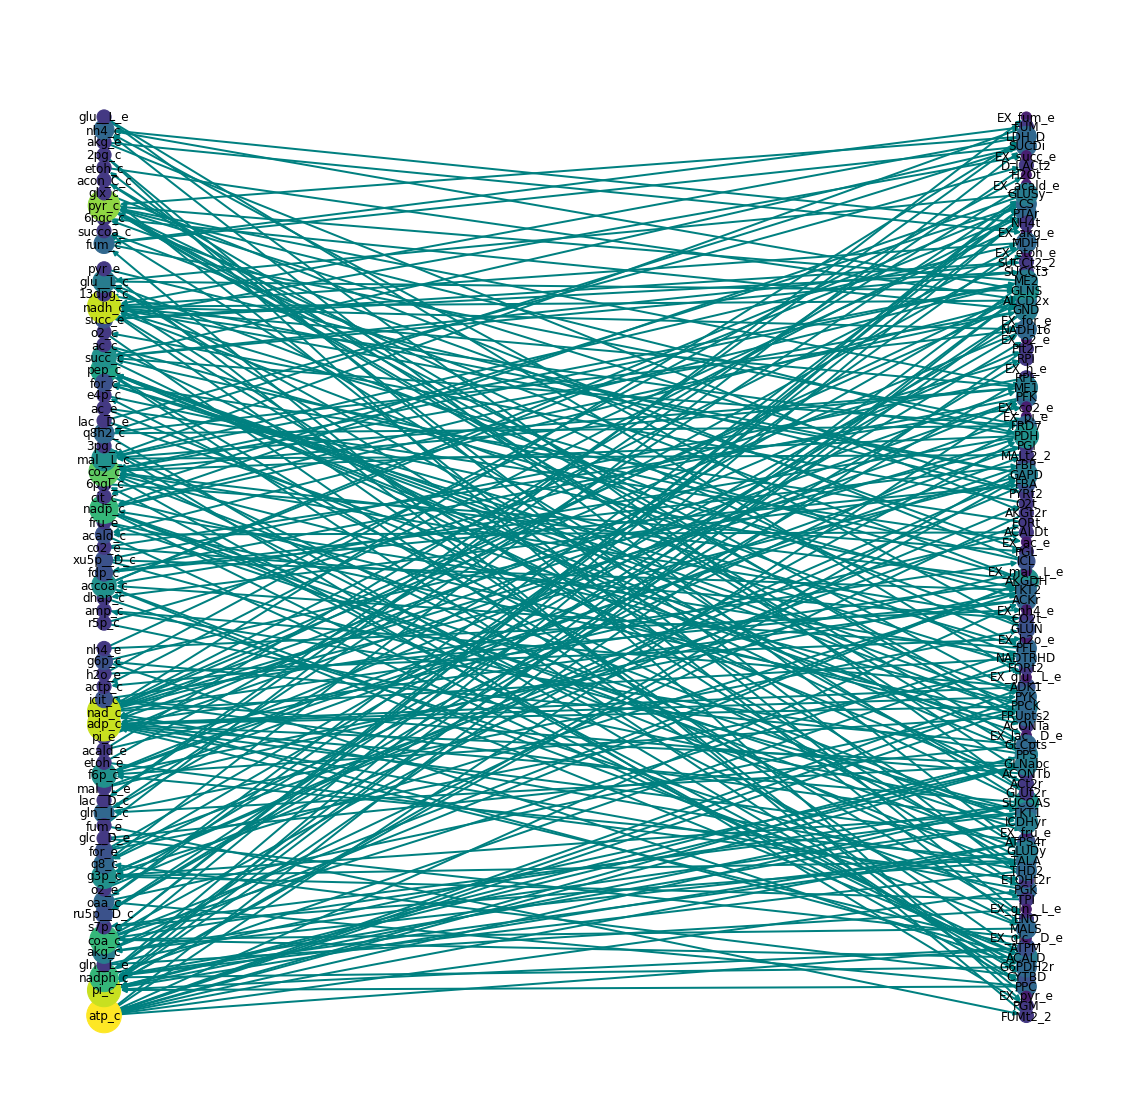

In [13]:
#nx.draw_networkx(B, width=1)

plt.figure(3,figsize=(20,20)) 
plt.title('E. Coli Core Metabolism, Orange nodes: metabolites, Green: reactions ', color='w')

G = B.copy()
G.remove_node("BIOMASS_Ecoli_core_w_GAM")
G.remove_node("h_c")
G.remove_node("h_e")
G.remove_node("h2o_c")


#draw_bipartite(B, z, mbls, input_path=longest_path, node_flag=True)
draw_bipartite(G, z, mbls, input_path=[], node_flag=True)

plt.show()

Network Summary Statistics

clustering coefficient, C     =  0.00
Average Harmonic Centrality, C_2     =  4.31
max degree, k_max = 35
max degree, k_std =  4.01


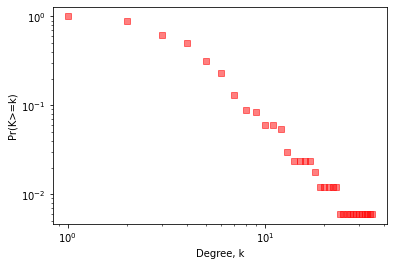

In [14]:
#diameter = nx.diameter(B) #max eccentricty from 1 node to furthest.
#Average shortest pathis we can report a number of statistics. The highest degree metabolite is h_c,  
#ellmean = nx.average_shortest_path_length(B) 
#How clustered nodes are
C = nx.transitivity(B)
C_2 = nx.harmonic_centrality(B)
C_2_mean = np.mean([c for (n, c) in B.degree()])

#Calculates all connected components
#h = nx.number_connected_components(B)
all_degrees = [d for (n, d) in B.degree()]
kmax = max(all_degrees)
kstd = np.std(all_degrees)

##### do not modify below here #####
#print(f'diameter = {diameter}')
#print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)
print(f'clustering coefficient, C     = %5.2f' % C)
print(f'Average Harmonic Centrality, C_2     = %5.2f' % C_2_mean)

#print(f'number of components,   h     =  {h}')
print(f'max degree, k_max = {kmax}')
print(f'max degree, k_std = %5.2f' % kstd)

def plot_CCDF(kis):
    # from PS5
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the CCDF of the degree distribution Pr(K>=k) for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    cumcounts = np.cumsum(counts)
    cumcounts = np.insert(cumcounts,0,0)
    plt.loglog(bins[1:-1], 1-cumcounts[1:-1], 'rs', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(K>=k)')
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams["figure.figsize"] = (7,6)
    plt.show()
    return

plot_CCDF(all_degrees)

<h3> Reaction Knockout by Centrality/Clustering

In [48]:
#Rnx = B.subgraph(rxns)

#G = B.to_undirected()

#C = nx.transitivity(G)
#C

#C = nx.degree_centrality(B)

#C = nx.closeness_centrality(B)
#measures closeness. The more central a node is the more close it is to others. Measures the shortest
#distance to adjacent nodes.
import re
C = nx.harmonic_centrality(B)
#C = nx.in_degree_centrality(B)
#C = nx.degree()
#Harmonic Centrality - average of reciprical distance
#Sort and Reverse
C = {k: v for k, v in sorted(C.items(), key=lambda item: item[1])}

#C = dict(reversed(list(C.items())))
C_list = []
C_scores = []
for str, func in C.items():
    if str in rxns and str != "BIOMASS_Ecoli_core_w_GAM" and str[0:2] != "EX" and str[len(str) -1: len(str)] != "t":
        print(str)
        C_list.append(str)
        C_scores.append(func)
        
        
        
D_list = []
D_scores = []
for (n, d) in B.degree():
    if (n in rxns) and n != "BIOMASS_Ecoli_core_w_GAM" and n[0:2] != "EX" and n[len(n) -1: len(n)] != "t":
        D_list.append(n)
        D_scores.append(d)
        #print(n, d)


PGM
ENO
RPI
TPI
PGI
TKT1
TKT2
TALA
ICL
FBA
ACONTa
RPE
FRUpts2
GLCpts
FUMt2_2
ETOHt2r
GLUt2r
ACt2r
FORt2
AKGt2r
PYRt2
MALt2_2
PIt2r
D_LACt2
LDH_D
ALCD2x
FRD7
ACKr
SUCCt2_2
PGK
SUCDi
ADK1
SUCCt3
ACONTb
ME1
MDH
ATPM
PPCK
PGL
FBP
GLNabc
FUM
NADTRHD
GLUN
PFK
GLNS
G6PDH2r
GND
ICDHyr
MALS
ME2
PPS
CS
PTAr
ACALD
AKGDH
PFL
SUCOAS
PPC
GLUDy
THD2
PDH
GAPD
ATPS4r
CYTBD
PYK
GLUSy
NADH16


In [25]:
x = 0
for i in tmodel.reactions:
    x+=1
print(x)

95


In [17]:
len(C_list)

94

<H3>KNOCKOUT BY NODE DEGREE

In [51]:

obj_vals = []
tmodel = cobra.io.load_model('e_coli_core')
tmodel.reactions.get_by_id("BIOMASS_Ecoli_core_w_GAM").objective_coefficient = 1.0
#tmodel.reactions.get_by_id("EX_glc__D_e").lower_bound = -10
#tmodel.reactions.get_by_id("EX_o2_e").lower_bound = -15    
#print(i)


sol_orig = tmodel.optimize().objective_value

for i in D_list:
    tmodel = cobra.io.load_model('e_coli_core')
    tmodel.reactions.get_by_id("BIOMASS_Ecoli_core_w_GAM").objective_coefficient = 1.0
    tmodel.reactions.get_by_id("EX_glc__D_e").lower_bound = -10
    tmodel.reactions.get_by_id("EX_o2_e").lower_bound = -15    
    #print(i)
    tmodel.reactions.get_by_id(i).knock_out()

    solution = tmodel.optimize()
    print(i)
    #print(solution.objective_value)
    delta = sol_orig - solution.objective_value
    obj_vals.append(delta)
#tmodel.reactions.GLUDy.flux


PFK
PFL
PGI
PGK
PGL
ACALD
AKGt2r
PGM
PIt2r
ALCD2x
ACKr
PPC
ACONTa
ACONTb
ATPM
PPCK
ACt2r
PPS
ADK1
AKGDH
ATPS4r
PTAr
PYK
PYRt2
RPE
CS
RPI
SUCCt2_2
CYTBD
D_LACt2
ENO
SUCCt3
ETOHt2r
SUCDi
SUCOAS
TALA
THD2
TKT1
TKT2
TPI
FBA
FBP
FORt2
FRD7
FRUpts2
FUM
FUMt2_2
G6PDH2r
GAPD


/home/gugu/mambaforge/envs/bioinfo/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


GLCpts
GLNS
GLNabc
GLUDy
GLUN
GLUSy
GLUt2r
GND
ICDHyr
ICL
LDH_D
MALS
MALt2_2
MDH
ME1
ME2
NADH16
NADTRHD
PDH


Text(0, 0.5, 'Objective Value')

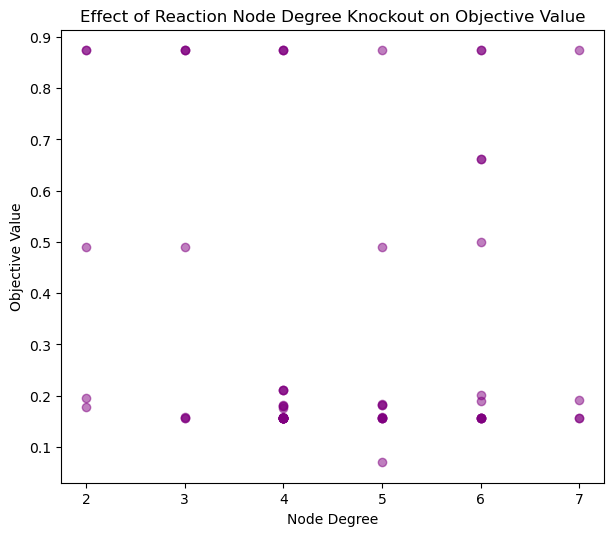

In [52]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = (7,6)
plt.scatter(D_scores, obj_vals, c='purple', alpha=0.5)
plt.title("Effect of Reaction Node Degree Knockout on Objective Value")
plt.xlabel("Node Degree")
plt.ylabel("Objective Value")

In [53]:
print(np.mean(obj_vals))

0.32381536198678434


<H3> KNOCKOUT BY HARMONIC CENTRALITY </h3>

In [82]:
obj_vals = []
tmodel = cobra.io.load_model('e_coli_core')
tmodel.reactions.get_by_id("BIOMASS_Ecoli_core_w_GAM").objective_coefficient = 1.0

sol_orig = tmodel.optimize().objective_value

for i in C_list:
    tmodel = cobra.io.load_model('e_coli_core')
    tmodel.reactions.get_by_id("BIOMASS_Ecoli_core_w_GAM").objective_coefficient = 1.0
    tmodel.reactions.get_by_id("EX_glc__D_e").lower_bound = -10
    tmodel.reactions.get_by_id("EX_o2_e").lower_bound = -15    
    # tmodel.reactions.get_by_id("EX_mal__L_e").lower_bound = -10
    # tmodel.reactions.get_by_id("EX_fru_e").lower_bound = -10
    # tmodel.reactions.get_by_id("EX_pyr_e").lower_bound = -10
    # tmodel.reactions.get_by_id("EX_lac__D_e").lower_bound = -10
    
    tmodel.reactions.get_by_id(i).knock_out()

    solution = tmodel.optimize()
    #print(solution.objective_value)
    delta =  solution.objective_value - sol_orig
    #print(i, delta)
    obj_vals.append(-delta)
#tmodel.reactions.GLUDy.flux


/home/gugu/mambaforge/envs/bioinfo/lib/python3.10/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


In [83]:
save = obj_vals
obj_vals = np.negative(obj_vals)

Text(0, 0.5, 'Objective Value Δ')

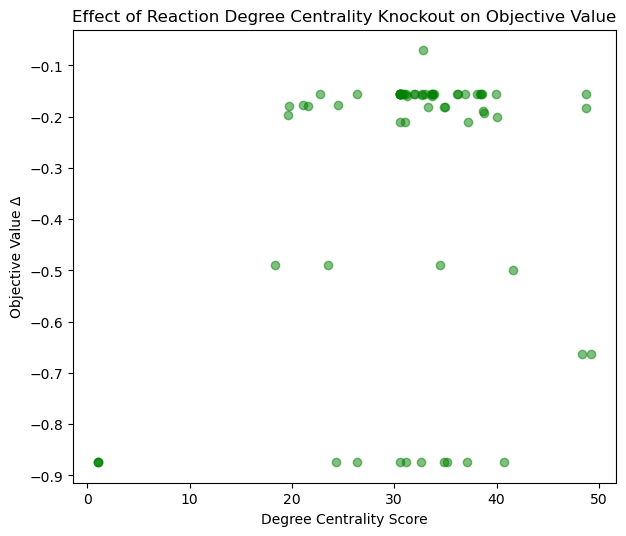

In [86]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.figsize"] = (7,6)
plt.scatter(C_scores, obj_vals, c = 'green', alpha = 0.5)
#plt.axhline(y = 0, color = 'orange', linestyle = 'dashed')    
plt.title("Effect of Reaction Degree Centrality Knockout on Objective Value")
plt.xlabel("Degree Centrality Score")
plt.ylabel("Objective Value Δ")

In [22]:
#obj_df = pd.DataFrame(columns=[models])   

#RESET MODELS HERE:
ecoli_models = models

model_dict = {}

for ecoli in ecoli_models:
    #Set object 
  ecoli.reactions.get_by_id("BIOMASS_Ec_iJO1366_core_53p95M").objective_coefficient = 0
  ecoli.reactions.get_by_id("BIOMASS_Ec_iJO1366_WT_53p95M").objective_coefficient = 1.0

  rxn_ids = ['PFK', 'PFL', 'PGM', 'PYRt2' ,'PGL', 'PPS', 'EX_ac_e', 'DM_amob_c']
  i = 0
  sol_dict = {}
  ecoli.reactions.get_by_id("EX_o2_e").lower_bound = -15
  ecoli.reactions.get_by_id("EX_glc__D_e").lower_bound = -10
    
  for rxn in ecoli.reactions:    
    if (rxn.id == rxn_ids[i]) and (i != len(rxn_ids) - 1):
      i += 1
            #ecoli.reactions.rxn.knock_out()
          #  print(rxn.id)
      rxn.knock_out()
      solution = ecoli.optimize()
      sol_dict[rxn.id] = solution.objective_value
            #obj_df[rxn, ecoli] = 0
            #obj_df.loc[rxn].ecoli = 1
      print(ecoli, ' knock out ', rxn.id , ' Growth Rate: ' , str(solution.objective_value), ' 1/h')
    #obj_df.append(sol_dict,ignore_index=True)
    #print("Solution dict", sol_dict)
  model_dict[ecoli.id] = sol_dict
  #Maybe reset all parameters
    
#print(model_dict)
obj_df = pd.DataFrame(model_dict)
obj_df


""


In [23]:
obj_df.plot()

#Question: best way to represent data in graph form to illustate knockout differences?
#Question convert the Bigg Model to a networkx graph to do more networky types of experiments?
#https://gitter.im/opencobra/cobrapy?at=5d223634631d3433ba416891

TypeError: no numeric data to plot

<h3> Notes </h3>

rxn_ids = ['PFK', 'PFL', 'PGM', 'PYRt2' ,'PGL', 'PPS', 'EX_ac_e', 'DM_amob_c']

- Best way to represent data in graph form to illustate knockout differences?
    What am I trying to say? What is the goal?

- Convert the Bigg Model to a networkx graph to do more networky types of experiments?

- Any way to undo knock outs? Seems to be affecting the model even after restarting.
    Consider targeting parts of the metabolic network. As a function of the network statistics. Knockout highest degree. Clustering Coefficient. Centrality Measurements. 
    Degree is a bad way to kill Ecoli. What is most effective piece of network to target. Don't use ER graph. 

    parse text of output metabolites. Can turn it into a network.
    
Find out what is causing persistent state.


We want to maximize the objective function (Biomass for all Ecoli) by optimizing the model given that certain reactions are knocked out.

"Metabolic flux analysis of E. coli knockouts: lessons from the Keio collection and future outlook":

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5842030/

__Notes as of 11/30__:

Found an interesting paper that edits an E. coli SBML to make a P3HB pathway (a biodegradable plastic found in other bacteria). They were able to increase the output of P3HB using the objective function an changing the medium/knocking out certain pathways. Unfortunately they don't seem to include any code at all... https://www.sciencedirect.com/science/article/pii/S0141022917301308?casa_token=-FJiNOPOfFwAAAAA:G0jBhswsFmLC9sVtCHs0rFCk9Hrs3KgsTOn_QoaWouXPAsyA6QyhZ3JAi_qHeTLa5O72ZbgNLA 

Otherwise, couldn't find any papers since 2016 that look at network structure. 

- Did a few centrality measurements and found pretty much what was expected. Substrates like h_c have highest scores.
- Sorted the reactions by closeness centrality and it definitely wrecks the objective value.

-- Tell how data got out of model.
-- Summarize the structure.
-- What insights from summary statistics.
-- 2 Input and 1 Output node, find all shortest paths between them. 
-- What reactions affect what. Paths touch Kreb's Cycle? Describe structure of those flows.
-- Describe hypothesis of centralitity. Describe expirement What does it tell me about the structure of metabolic networks?
-- Lean heavy into the interpretation side of stuff. 

<h2> Changing growth media experiments:

In [ ]:
# with model: 
#     new_medium = model.medium
#     new_medium['EX_h2o_e'] = 0.01
#     model.medium = new_medium
#     print(model.slim_optimize())
#     print(model.medium)
# #model.medium

# medium = model.medium
# medium["EX_o2_e"] = 0.0
# model.medium = medium

# model.medium

In [ ]:
# def read_json_file(filename):
#     with open(filename) as f:
#         js_graph = json.load(f)
#     return nx.node_link_graph(js_graph)

# read_json_file('./data/iEcHS_1320.json')
#nx.read_gml('./data/iEC1344_C.xml')
# nx.read_graphml("./data/iEcHS_1320.xml")

In [ ]:
# import scipy as sc

# path = 'file.mat'

# raw_data = sc.loadmat(path, squeeze_me=True)

# data = raw_data['data_struct']